# Lecture 13: PCA

In [ ]:
import numpy as np
import numpy.linalg as la
import scipy.stats as stats
import sympy as sp
from sympy import Matrix

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator
from matplotlib.markers import MarkerStyle
from matplotlib import colormaps

from plotvec import plotvec, plotvecR

import pandas as pd

# PCA Example: Simple illustrative example

The example from our lecture

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data (5 points in 3D)
x = np.array([2, 4, 4, 0, 1])
y = np.array([3, 2, 4, 6, 7])
z = np.array([1, 4,3, 7, 8])


# Create a figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(x, y, z, color='b', marker='o')

# Label axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set the title
ax.set_title('3D Scatter Plot')
# Show the plot
plt.show()

1. compute the centered data matrix

In [ ]:
M =  # todo. stack all vectors into matrix
x_mean, y_mean, z_mean = x.mean(), y.mean(), z.mean()
M_c =  # centered data set


In [ ]:
# plot the centered data
# Create a figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(#todo,  color='b', marker='o')

# Label axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set the title
ax.set_title('3D Scatter Plot')
plt.savefig('3d.png')
# Show the plot
plt.show()

2. Compute the covariance matrix of the centered data

In [ ]:
K=  #todo
K

3. Perform eigendecomposition of the covariance matrix

In [ ]:
from numpy import linalg as LA

In [ ]:
eigenvalues, eigenvectors = # todo


In [ ]:
eigenvalues

In [ ]:
eigenvectors

In [ ]:
# additionally, we can sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of eigenvalues in descending order
eigenvectors_sorted = # todo 

In [ ]:
sorted_indices

In [ ]:
eigenvectors_sorted

4. Project the centered data point to the first K PCs

In [ ]:
k=1

In [ ]:
M_projected1 = # todo
M_projected1

In [ ]:
k=2
M_projected2  = # todo
M_projected2 

5. Plot the data after projection


In [ ]:
plt.scatter( ,  , color='blue', label='Projected Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projected onto the Top 2 Eigenvectors')
plt.grid(True)
plt.show()

Example 2: Friend food choice


In [ ]:
F = np.array([[10 ,1, 2,7] ,[ 7,2, 1,10],[2, 9, 7, 3],[ 3,6, 10,2]])
F

In [ ]:
#1. center the data:

Fc =  # todo
Fc

In [ ]:
#2. compute the covariance
KFood =  # todo
KFood

In [ ]:
#3. perform eigendecomponsition
eigenvalues_f, eigenvectors_f = # todo
eigenvalues_f


In [ ]:
eigenvectors_f

In [ ]:
sorted_indices_food = np.argsort(eigenvalues_f)[::-1]  # Indices of eigenvalues in descending order
eigenvectors_sorted_food = eigenvectors_f[:, sorted_indices]
eigenvectors_sorted_food

In [ ]:
#4. project to top k PC

F_projected  =  # todo
F_projected

In [ ]:
plt.scatter( ,  , color='blue', label='Projected Data')
names = ['Alice', 'Bob', 'Carolyn', 'Dave']
# Annotate each point with its index
for i, (x, y) in enumerate(F_projected):
    plt.text(x + 0.1, y + 0.1, names[i], fontsize=9, color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projected onto the Top 2 Eigenvectors')
plt.grid(True)
plt.show()

## PCA Example: Feature Extraction for Handwriting Recognition

In this section, we will use PCA to perform dimensionality reduction on a common database of handwritten digits. 

We will use the UCI MNIST database, which is commonly used in the study of machine learning and is included in the `scikit-learn` library. 
* MNIST stands for "Modified National Institute of Standards and Technology."
* The full MNIST database consists of 70,000 images  of handwritten digits from 0 to 9.
* Each image is normalized to fit in a $28 \times 28$ pixel bounding box and anti-aliased. 
* The UCI MNIST database provided by `scikit-learn` consists of 1797 data points, each of which is a processed version of the original MNIST image.
* The data in UCI MNIST are images of dimension $8 \times 8$. 

Because I want to show you visually how the bases create features that differentiate among the digits, we will  only use the 
537 entries that correspond to digits 0, 1, and 2. We can load the data for these classes as follows:

In [ ]:
k=2

In [ ]:
from sklearn import datasets

In [ ]:
digits = datasets.load_digits(n_class=3)

digits.keys()

Examples from the database for each of these digits are shown in the
figure below:

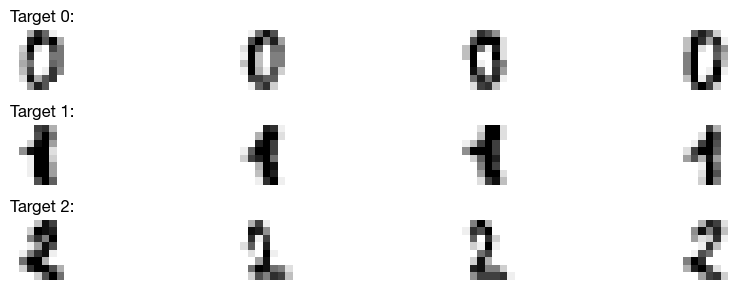

These images have overall dimension $8 \times 8 = 64$, which is much lower than the original MNIST data.

However, it is still much larger than most  of the datasets we have encountered so far, and we may be able to reduce the dimensionality while preserving the most-important information. 

To perform PCA, we need the data in the form of vectors instead of two-dimensional images (or corresponding matrix representations). 

The `digits` object has a `digits.data` attribute that contains "flattened" versions of the images, in which the 8 different rows of data representing an image are concatenated to form a single length-64 vector.

As is usual for `scikit-learn` data sets, each row of `digits.data` corresponds to a data point (i.e., one MNIST handwriting sample), so the resulting shape of the `digits.data` array is:

In [ ]:
digits.data.shape

We will store the data for use with NumPy's methods:

In [ ]:
mnist= digits.data

At this point, we would compute the centered data sets.

However, for the UCI MNIST data set, every variable represents the same thing: a value from 0 to 16 that represents a downsampled version of the original MNIST data.

Because each variable represents the same type of information with the same range, no need to center it.

Now we can calculate the sample covariance matrix for the length-64 data.

Because it is hard to extract meaning from looking at a $64 \times 64$ covariance matrix, 
we use a *heatmap* to visualize it:

**heatmap**
>  A plot that maps each value in a matrix to a corresponding color. The different matrix values are then shown together by plotting the associated colors as rectangles in an image grid.

In [ ]:
Kmnist= 
plt.imshow( # todo )
plt.colorbar()

The blocking effect comes from the fact that the data represents $8 \times 8$ images that have been "flattened" into length-64 vectors.  

Each line of 8 pixels that starts on a boundary $8k$ represents one line in the original image. 

In [ ]:
plt.imshow(Kmnist[24:32,32:40], cmap=cm.coolwarm)
plt.colorbar()

The highest correlations are among those lines of the image that are close to the center. 

Let's find the eigendecomposition of `Kmnist` and sort the eigenvalue-eigenvector pairs in decreasing order of the eigenvalue:


In addition, we will sort the eigenvalue-eigenvector pairs in decreasing order of the eigenvalues.

The function `np.argsort()` returns the indexes required to sort the values in increasing order.
* We will use the index `[::-1]` to reverse that order.

Finally, fancy indexing is used to sort the eigenvalues and eigenvectors to create new sorted variables `lam_mnist` and `U_mnist`:

In [ ]:
# Do the eigenecomposition
la, U =  # todo
la

In [ ]:
# Get the ordering
la_sorted_indices = np.argsort(la)[::-1]  # Indices of eigenvalues in descending order
la_sorted_indices

In [ ]:
# Now sort the lambdas and the columns of U
la_mnist = la[la_sorted_indices]
la_mnist

In [ ]:
U_mnist = #  


The eigenvalues decrease quickly as we proceed through the sorted array.

A useful tool in dimensionality reduction is to visualize the relation among the eigenvalues. A typical way to do that is a *scree plot*:

**scree plot**
>  In PCA, a *scree plot* is a line plot that illustrates the eigenvalues of the covariance matrix of a multidimensional data set.


In [ ]:
plt.plot(la_mnist)
plt.xlabel('Component #')
plt.ylabel('Eigenvalue');

Note that the eigenvalues decrease quickly with the component number. 

This is the case for most data sets, and it means that most of the variation in the data can be captured using a much smaller
number of features than is present in the full data set.

Since the features at the output of PCA are decorrelated, the total variance of the data set is equal to the
sum of the eigenvalues:


To perform dimensionality reduction, we will utilize some $K<64$ features with the highest eigenvalues.

We can assess the impact of this dimensionality reduction in terms of the *explained variance*:

**explained variance (dimensionality reduction)**
> In dimensionality reduction, the *explained variance* is the ratio of the total variance after dimensionality reduction to the total variance of the original data set.

Using PCA, the total variance after reduction to $K$ features is equal to the sum of the $K$ largest eigenvalues. 

We can find the total variance after dimensionality reduction for every $K$ by applying `np.cumsum()` to find the cumulative sums of the eigenvalues:

In [ ]:
total_variance_cumsum= 

Then a plot of the explained variance can be generated by dividing the total variances after dimensionality reduction by the total variance of the input data set:

In [ ]:
total_variance_all = np.sum(la_mnist)
plt.plot(#todo)
plt.xlabel('No. of preserved features')
plt.ylabel('Explained variance')
plt.title('Effect of dimensionality reduction on the MNIST data set');

If we only use two features, the fraction of explained variance is

Using two features also has the advantage that we can visualize the data using
a scatter plot. 

In [ ]:
# projection into the top two eigenvector
mnist_projected = # todo
mnist_projected

Let's find the covariance matrix of the output data to confirm that the data is decorrelated and the variances match the first two eigenvalues:

In [ ]:
K_projected =  
K_projected

In [ ]:
digits.target

Now let's visualize the data using a scatter plot on the 2-D data from PCA.

In [ ]:
markers = ['o', 'x', '^']
for digit_value in range(3):
    targets = np.where(digits.target == digit_value)
    plt.scatter( ,  ,
              c='C'+str(digit_value), marker=markers[digit_value], 
              label= f'Digit {digit_value}')
plt.xlabel('Output feature 1')
plt.ylabel('Output feature 2')
plt.title('MNIST data reduced to 2 dimensions via PCA');
plt.legend();

Two features are sufficient to create almost completely distinct clusters among these three data classes. 

They cannot be separated using just lines, but more advanced machine learning algorithms can be used to
easily create a classifier using just these two features.

In [ ]:
# Time permitting, using k-means cluster

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit()
labels=  # todo
centers =  # todo

In [ ]:
# Step 3: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(#todo, #todo, c= #todo, cmap='viridis', s=50, label='Data points')
plt.scatter(#todo, #todo, c='red', s=200, marker='X', label='Centroids') # plot the centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### A confusion matrix is a table used to evaluate the performance of a classification model, displaying the counts of true positives, true negatives, false positives, and false negatives. 

Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

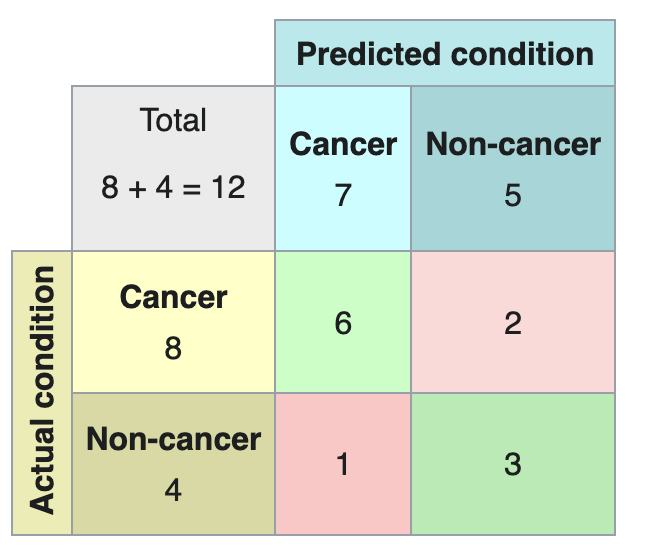

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
y_pred = labels
cm = confusion_matrix(digits.target, y_pred)
cm

In [ ]:
# e.g. the true label is 0 but the predicted value is 1 has 178.
# the true label being 1 but predicted to be 0 has 34.
# the true labeling being 2 but predicted to be 0 has 159